# Aim :
## Predicting Stock prices of Apple, Google and Amazon
Our first aim is to predict the next day closing stock price for Apple, Google and Amazon. **For this we will train the model that learns from the data of all the 3 companies.**
## Experiment with Transfer Learning
After this we will see if we can design a model that only learns from the data of a single company (**Google**), but predicts well for the other two (**Apple and Amazon**) also. This is called **Transfer Learning**.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Dataset 

In [ ]:
import numpy as np
import pandas
import seaborn
import matplotlib.pyplot as plt

In [ ]:
df = pandas.read_csv('/content/drive/MyDrive/NYSE STOCK PRICE PREDICTION PROJECT/DATASET/prices.csv')

In [ ]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
print(df.shape)

(851264, 7)


# Filtering out the dataset
Our aim will be limited to predicting **Apple, Google and Amazon stocks**. Ticker symbol for the respective companies are AAPL, GOOGL and AMZN.

In [ ]:
print(df[df['symbol'] == 'AAPL'].shape)
print(df[df['symbol'] =='GOOGL'].shape)
print(df[df['symbol'] == 'AMZN'].shape)

(1762, 7)
(1762, 7)
(1762, 7)


In [ ]:
main_df = df[(df['symbol'] == 'AAPL') | (df['symbol'] == 'GOOGL') | (df['symbol'] == 'AMZN')].reset_index(drop = True)

In [ ]:
print('Number of missing values : ' + str(main_df.isna().sum().sum()))

Number of missing values : 0


In [ ]:
main_df.head(9)

,date,symbol,open,close,low,high,volume
0,2010-01-04,AAPL,213.429998,214.009998,212.380001,214.499996,123432400.0
1,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0
2,2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
3,2010-01-05,AAPL,214.599998,214.379993,213.249994,215.589994,150476200.0
4,2010-01-05,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0
5,2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
6,2010-01-06,AAPL,214.379993,210.969995,210.750004,215.230000,138040000.0
7,2010-01-06,AMZN,134.600006,132.250000,131.649994,134.729996,7178800.0
8,2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0


# Starting and ending duration

In [ ]:
print(main_df['date'].min())
print(main_df['date'].max())

2010-01-04
2016-12-30


So we have data from **4th of January, 2010** to **30th of December, 2016**

# One hot encode the symbols

In [ ]:
main_df = pandas.get_dummies(main_df, columns = ['symbol'])

In [ ]:
main_df.head(9)

,date,open,close,low,high,volume,symbol_AAPL,symbol_AMZN,symbol_GOOGL
0,2010-01-04,213.429998,214.009998,212.380001,214.499996,123432400.0,1,0,0
1,2010-01-04,136.250000,133.899994,133.139999,136.610001,7599900.0,0,1,0
2,2010-01-04,626.950006,626.750011,624.240011,629.510005,3908400.0,0,0,1
3,2010-01-05,214.599998,214.379993,213.249994,215.589994,150476200.0,1,0,0
4,2010-01-05,133.429993,134.690002,131.809998,135.479996,8851900.0,0,1,0
5,2010-01-05,627.180001,623.990017,621.540016,627.839984,6003300.0,0,0,1
6,2010-01-06,214.379993,210.969995,210.750004,215.230000,138040000.0,1,0,0
7,2010-01-06,134.600006,132.250000,131.649994,134.729996,7178800.0,0,1,0
8,2010-01-06,625.860033,608.260035,606.360021,625.860033,7949400.0,0,0,1


In [ ]:
from tabulate import tabulate
info = [[col, main_df[col].count(), main_df[col].max(), main_df[col].min()] for col in main_df.columns]
print(tabulate(info, headers = ['Feature', 'Count', 'Maximum', 'Minimum'], tablefmt= 'orgtbl'))

| Feature      |   Count | Maximum     | Minimum    |
|--------------+---------+-------------+------------|
| date         |    5286 | 2016-12-30  | 2010-01-04 |
| open         |    5286 | 1226.800064 | 90.0       |
| close        |    5286 | 1220.169982 | 90.279999  |
| low          |    5286 | 1218.60002  | 89.470001  |
| high         |    5286 | 1228.880013 | 90.699997  |
| volume       |    5286 | 470249500.0 | 520600.0   |
| symbol_AAPL  |    5286 | 1           | 0          |
| symbol_AMZN  |    5286 | 1           | 0          |
| symbol_GOOGL |    5286 | 1           | 0          |


# Exploratory Data Analysis

In [ ]:
main_df = main_df.drop(['date'], axis = 1)

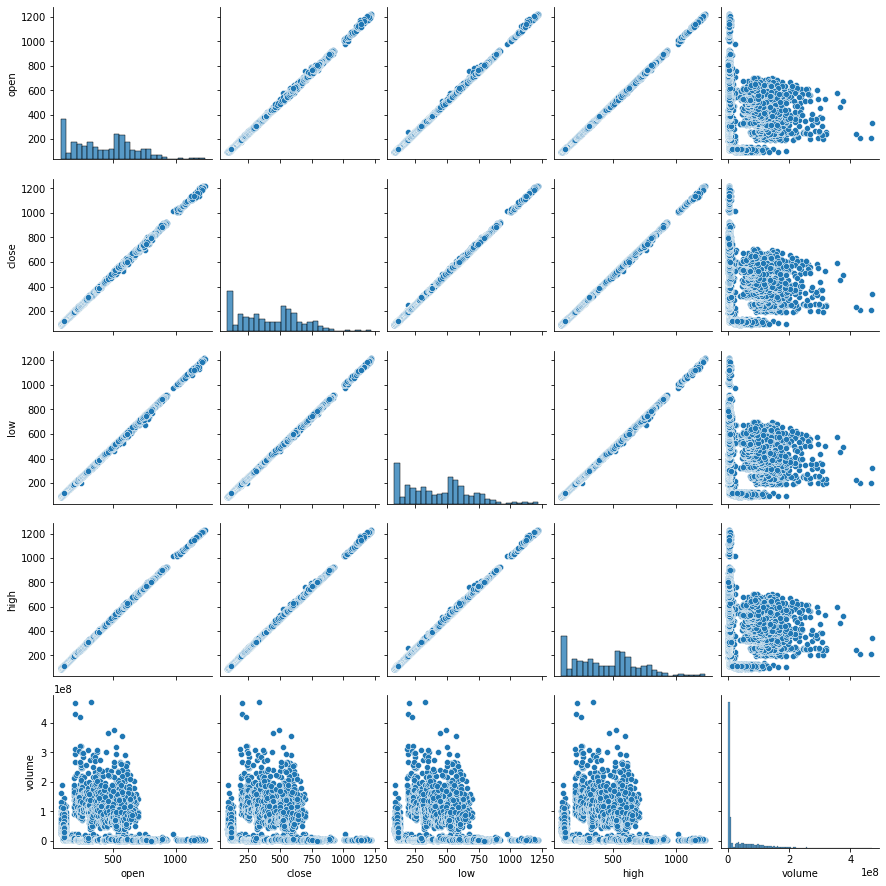

In [ ]:
seaborn.pairplot(main_df.drop(['symbol_AAPL', 'symbol_AMZN', 'symbol_GOOGL'], axis = 1))

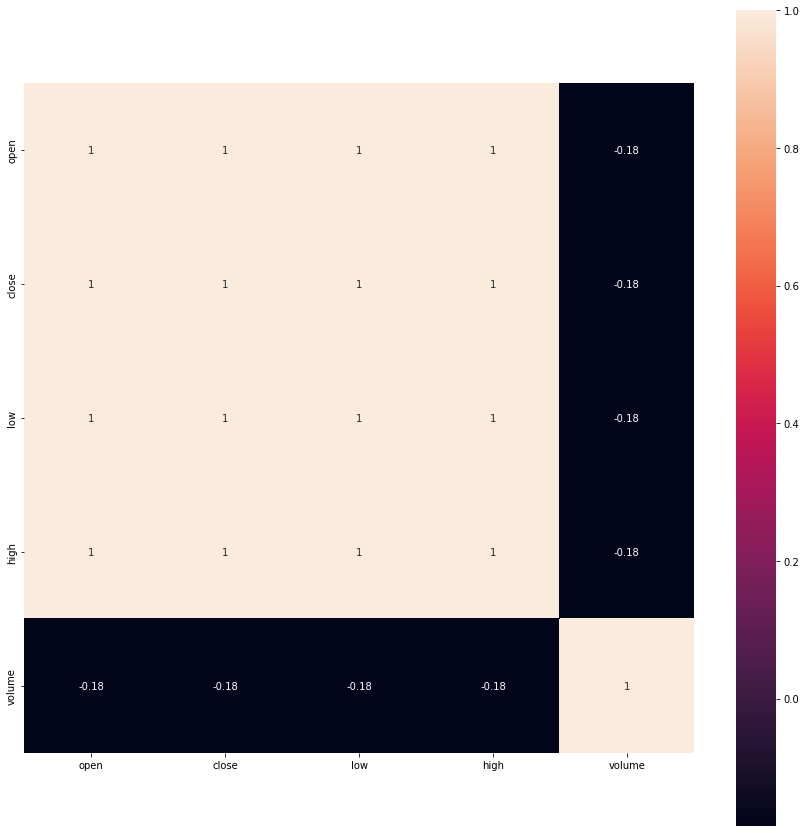

In [ ]:
plt.figure(figsize = (15,15))
mat = main_df.drop(['symbol_AAPL', 'symbol_AMZN', 'symbol_GOOGL'], axis = 1).corr()
seaborn.heatmap(mat, annot = True, square = True)

In [ ]:
info = ['open', 'close', 'low', 'high', 'volume']

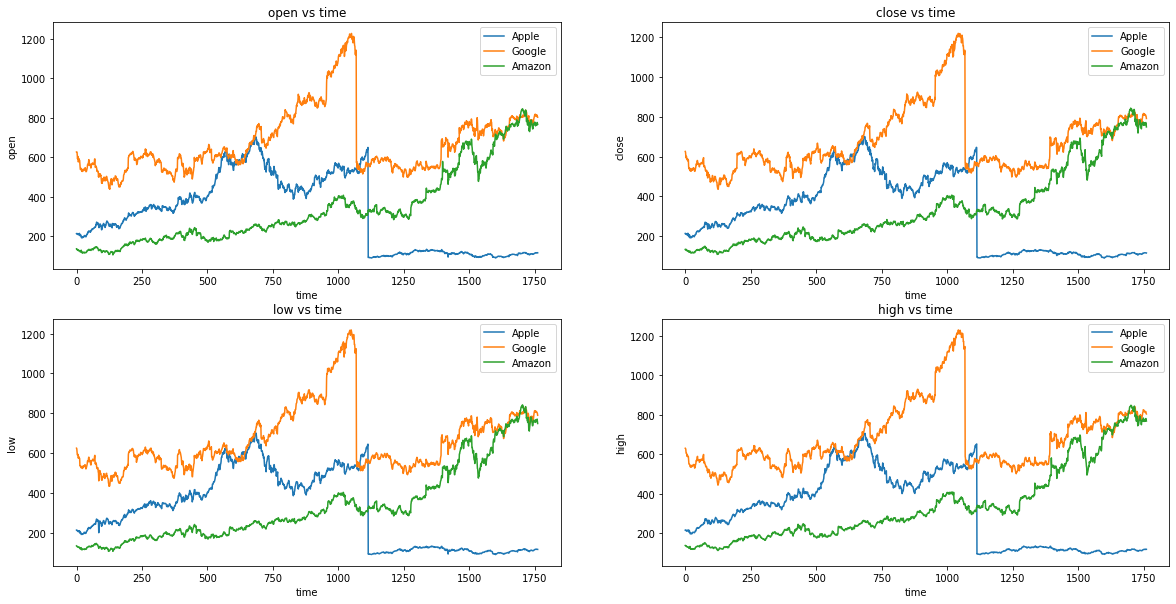

In [ ]:
plt.figure(figsize = (20,10))

for i in range(4) :
    plt.subplot(2,2,i+1)
    
    plt.plot(main_df[main_df['symbol_AAPL'] == 1][info[i]].values)
    plt.plot(main_df[main_df['symbol_GOOGL']== 1][info[i]].values)
    plt.plot(main_df[main_df['symbol_AMZN'] == 1][info[i]].values)
    plt.xlabel('time' )
    plt.ylabel(info[i])
    plt.legend(['Apple', 'Google', 'Amazon'])
    plt.title(info[i] + ' vs time')
plt.show()

Since open price, low price, and high price are linearly correlated with closing price, only one of them will be selected to feed the model, to avoid overfitting. And the second feature will be **volume traded**.

In [ ]:
info = [[col, main_df[col].count(), main_df[col].max(), main_df[col].min()] for col in main_df.columns]
print(tabulate(info, headers = ['Feature', 'Count', 'Maximum', 'Minimum'], tablefmt = 'orgtbl'))

| Feature      |   Count |       Maximum |   Minimum |
|--------------+---------+---------------+-----------|
| open         |    5286 | 1226.8        |     90    |
| close        |    5286 | 1220.17       |     90.28 |
| low          |    5286 | 1218.6        |     89.47 |
| high         |    5286 | 1228.88       |     90.7  |
| volume       |    5286 |    4.7025e+08 | 520600    |
| symbol_AAPL  |    5286 |    1          |      0    |
| symbol_AMZN  |    5286 |    1          |      0    |
| symbol_GOOGL |    5286 |    1          |      0    |


# Create the dataset
We will use past 300 days data to predict future stock prices, 100 days of stock data for each company. We will use three fields, apart from **opening price and volume traded** to symbolize the company to which the data belongs to.

In [ ]:
X = np.array(main_df.drop(['close', 'low', 'high'], axis = 1))
y = np.array(main_df['close'])

In [ ]:
print(X.shape)
print(y.shape)

(5286, 5)
(5286,)


# Scaling the columns

In [ ]:
print(X[:3])

[[2.13429998e+02 1.23432400e+08 1.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.36250000e+02 7.59990000e+06 0.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [6.26950006e+02 3.90840000e+06 0.00000000e+00 0.00000000e+00
  1.00000000e+00]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [ ]:
print(X[:3])

[[0.1085767  0.2616654  1.         0.         0.        ]
 [0.04068437 0.01507103 0.         1.         0.        ]
 [0.4723346  0.00721225 0.         0.         1.        ]]


In [ ]:
print(y.min())
print(y.max())

90.279999
1220.169982


In [ ]:
temp = MinMaxScaler().fit_transform(np.reshape(y, (len(y),1)))
y = temp.reshape(-1)

In [ ]:
print(y.min())
print(y.max())

0.0
1.0


In [ ]:
print(X.min())
print(X.max())

0.0
1.0


In [ ]:
print(y[3:6])

[0.1098337  0.03930471 0.47235574]


# Creating the actual time series based numpy array
An **important** point to note is that we will have three outputs or target labels in y. These are the three closing prices, each for AAPL, AMAZN and GOOGL respectively.

In [ ]:
length = 300                         # 100 days * 3 companies

X_res = []
y_res = []

for i in range(length,len(X)-2) :
    X_res.append(X[i-length:i])      # contains features for past 100 days for 3 companies.
    y_res.append(y[i:i+3])           # the next three closing prices for AAPL, AMZN, GOOGL.

X_res = np.array(X_res)
y_res = np.array(y_res)

In [ ]:
print(X_res.shape)
print(y_res.shape)

(4984, 300, 5)
(4984, 3)


# Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X_res, y_res, test_size = 0.3, shuffle = True, random_state = 1)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(3488, 300, 5)
(3488, 3)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(1496, 300, 5)
(1496, 3)


# Model creation
### Recurrent Neural Network
Vanilla neural networks do not have a memory and so they do not take into account any past event for predictions. But this kind of model is poor when working with time series data, where there is dependency accross time. This is where RNN come in. A RNN model has **memory**, which can help in retaining past data and so the predictions are made on those basis.

### Long Short Term Memory
Simple RNN models have a **short term memory** and are not able to retain dependencies that occured long before the current state. So LSTM or **long short term memory** is used to retain those dependencies as well, using something called gated units. More info can be found [here](https://medium.com/x8-the-ai-community/understanding-recurrent-neural-networks-in-6-minutes-967ab51b94fe).

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import BatchNormalization

from keras.layers import Input

In [ ]:
def lstm_layer (hiddenx) :
    
    model = Sequential()
    
    model.add(Bidirectional(LSTM(hiddenx, activation = 'tanh', return_sequences = True)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    return model

In [ ]:
def rnn (hidden1, hidden2, hidden3) :
    
    model = Sequential()
    
    # Input Block
    model.add(Input((length, 5,)))
    
    # LSTM Block
    model.add(lstm_layer(hidden1))
    model.add(lstm_layer(hidden2))
    model.add(Bidirectional(LSTM(hidden3, activation = 'tanh', return_sequences = False)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    # Output Block
    model.add(Dense(3, activation = 'linear'))
    
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

In [ ]:
model = rnn(128, 128, 32)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 300, 256)          138240    
                                                                 
 sequential_2 (Sequential)   (None, 300, 256)          395264    
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               73984     
 nal)                                                            
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
checkp = ModelCheckpoint('./result_model.h5', monitor = 'val_loss', save_best_only = True, verbose = 1)

In [ ]:
history = model.fit(X_train, y_train, epochs = 5, batch_size = 32, validation_data = (X_test, y_test), callbacks = [checkp])

Epoch 1/5
109/109 [==============================] - ETA: 0s - loss: 0.0100
Epoch 1: val_loss improved from 0.00279 to 0.00235, saving model to ./result_model.h5
109/109 [==============================] - 328s 3s/step - loss: 0.0100 - val_loss: 0.0024
Epoch 2/5
109/109 [==============================] - ETA: 0s - loss: 0.0090
Epoch 2: val_loss improved from 0.00235 to 0.00217, saving model to ./result_model.h5
109/109 [==============================] - 307s 3s/step - loss: 0.0090 - val_loss: 0.0022
Epoch 3/5
109/109 [==============================] - ETA: 0s - loss: 0.0082
Epoch 3: val_loss improved from 0.00217 to 0.00188, saving model to ./result_model.h5
109/109 [==============================] - 303s 3s/step - loss: 0.0082 - val_loss: 0.0019
Epoch 4/5
109/109 [==============================] - ETA: 0s - loss: 0.0078
Epoch 4: val_loss improved from 0.00188 to 0.00175, saving model to ./result_model.h5
109/109 [==============================] - 304s 3s/step - loss: 0.0078 - val_loss:

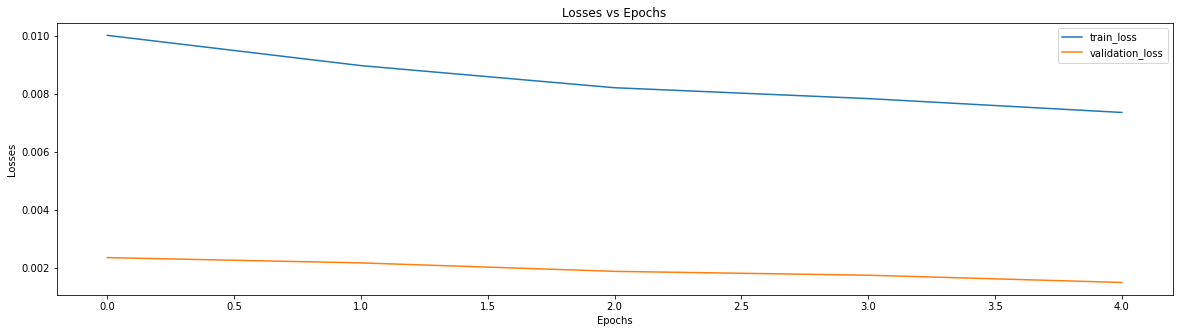

In [45]:
plt.figure(figsize = (20, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'validation_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Losses vs Epochs')
plt.show()

In [46]:
from keras.models import load_model
model = load_model('./result_model.h5')

# Prediction

In [47]:
pred = model.predict(X_test)

47/47 [==============================] - 36s 706ms/step


In [48]:
print(pred.shape)

(1496, 3)


# Performance Metrics
#### Mean Squared Error
Sum of squares of differences between actual value and predicted value, divided by the total number of samples. This is an **absolute measure**.
#### R-squared score
Basically this metric evaluates how well the model performs compared to predicting mean for every sample. This is a **relative measure**.

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
print('mean squared error : ' + str(mean_squared_error(y_test, pred)))
print('r2_score : ' + str(r2_score(y_test, pred)))

mean squared error : 0.0014969477052195201
r2_score : 0.9673499236317477


# Plot the Prediction and Test value

Text(0.5, 1.0, 'Comparison in closing prices for Google')

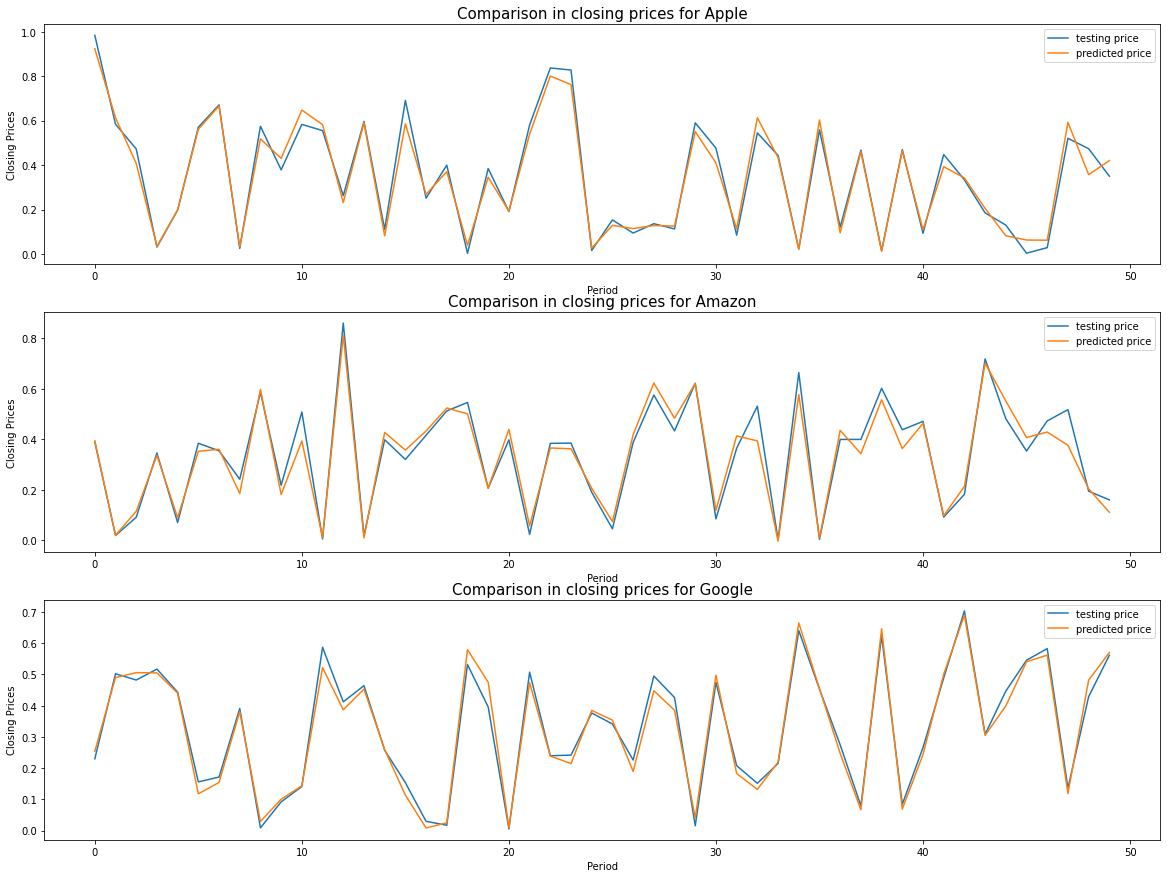

In [50]:
plt.figure(figsize = (20,15))

plt.subplot(3,1,1)
plt.plot(y_test[:50,0])
plt.plot(pred[:50,0])
plt.xlabel('Period')
plt.ylabel('Closing Prices')
plt.legend(['testing price','predicted price'])
plt.title('Comparison in closing prices for Apple', fontsize = 15)


plt.subplot(3,1,2)
plt.plot(y_test[:50,1])
plt.plot(pred[:50,1])
plt.xlabel('Period')
plt.ylabel('Closing Prices')
plt.legend(['testing price','predicted price'])
plt.title('Comparison in closing prices for Amazon',fontsize = 15)


plt.subplot(3,1,3)
plt.plot(y_test[:50,2])
plt.plot(pred[:50,2])
plt.xlabel('Period')
plt.ylabel('Closing Prices')
plt.legend(['testing price','predicted price'])
plt.title('Comparison in closing prices for Google',fontsize = 15)

# Transfer learning

In [51]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [53]:
df = pandas.read_csv('/content/drive/MyDrive/NYSE STOCK PRICE PREDICTION PROJECT/DATASET/prices.csv')

In [54]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


# Taking stock price data of Google

In [55]:
df = df[df['symbol'] == 'GOOGL'].reset_index(drop = True)

In [56]:
df.head()

,date,symbol,open,close,low,high,volume
0,2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
1,2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
2,2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0
3,2010-01-07,GOOGL,609.400008,594.100015,592.649990,609.999993,12815700.0
4,2010-01-08,GOOGL,592.000005,602.020005,589.110015,603.250036,9439100.0


In [57]:
df = df.drop(['symbol'], axis = 1)

In [58]:
print('Starting date : ' + str(df['date'].min()))
print('Lasting date  : ' + str(df['date'].max()))

Starting date : 2010-01-04
Lasting date  : 2016-12-30


So the we have data from **04th January, 2010 to 30th December, 2016**.

In [59]:
print('Number of missing values : ' + str(df.isna().sum().sum()))
print(df.shape)

Number of missing values : 0
(1762, 6)


It has already been observed that features **open, close, low and high** are highly correlated, so we must drop two of them (**low and high**) and **date** column. The other feature will be **volume traded**.

In [60]:
from tabulate import tabulate

In [61]:
info = [[col, df[col].count(), df[col].max(), df[col].min()] for col in df.columns]
print(tabulate(info, headers = ['Feature', 'Count', 'Maximum', 'Minimum'], tablefmt = 'orgtbl'))

| Feature   |   Count | Maximum     | Minimum    |
|-----------+---------+-------------+------------|
| date      |    1762 | 2016-12-30  | 2010-01-04 |
| open      |    1762 | 1226.800064 | 438.310006 |
| close     |    1762 | 1220.169982 | 436.069999 |
| low       |    1762 | 1218.60002  | 433.629998 |
| high      |    1762 | 1228.880013 | 442.28     |
| volume    |    1762 | 29619900.0  | 520600.0   |


In [62]:
X = np.array(df.drop(['date', 'high', 'low', 'close'], axis = 1))
y = np.array(df['close'])

In [63]:
print(X.shape)
print(y.shape)

(1762, 2)
(1762,)


# Scale

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
X = MinMaxScaler().fit_transform(X)

In [66]:
t = np.reshape(y, (len(y),1))
t = MinMaxScaler().fit_transform(t)
y = t.reshape(-1)

In [67]:
print(X.max())
print(X.min())

1.0000000000000002
0.0


In [68]:
print(y.max())
print(y.min())

1.0
0.0


# Convert to time series data

In [69]:
length = 300

X_res = []
y_res = []

for i in range(length , len(X)) :
    X_res.append(X[i-length:i])
    y_res.append(y[i])

X_res = np.array(X_res)
y_res = np.array(y_res)

In [70]:
print(X_res.shape)
print(y_res.shape)

(1462, 300, 2)
(1462,)


# Train/test split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 1)

In [73]:
print(X_train.shape)
print(y_train.shape)

(1169, 300, 2)
(1169,)


In [74]:
print(X_test.shape)
print(y_test.shape)

(293, 300, 2)
(293,)


# Build the model

In [75]:
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import BatchNormalization

In [76]:
'''
def lstm_layer (hiddenx) :
    
    model = Sequential()
    
    model.add(Bidirectional(LSTM(hiddenx, activation = 'tanh', return_sequences = True)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    return model
'''

def mod (hidden1, hidden2, hidden3) :
    
    model = Sequential()
    
    # Input layer
    model.add(Input((length, 2,)))
    
    # lstm layer
    model.add(lstm_layer(hidden1))
    model.add(lstm_layer(hidden2))
    model.add(Bidirectional(LSTM(hidden3, activation = 'tanh', return_sequences = False)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    # output layer
    model.add(Dense(1, activation = 'linear'))
    
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    
    return model

In [77]:
model = mod(128, 64, 64)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 300, 256)          135168    
                                                                 
 sequential_5 (Sequential)   (None, 300, 128)          164864    
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                

# Model training

In [81]:
from keras.callbacks import ModelCheckpoint
checkp = ModelCheckpoint('./transfer_model.h5', monitor = 'val_loss', verbose = 1, save_best_only = True)

In [82]:
history = model.fit(X_train, y_train, epochs = 5, batch_size = 32, callbacks = [checkp], validation_data = (X_test, y_test))

Epoch 1/5
37/37 [==============================] - ETA: 0s - loss: 1.1261
Epoch 1: val_loss improved from inf to 0.05563, saving model to ./transfer_model.h5
37/37 [==============================] - 103s 2s/step - loss: 1.1261 - val_loss: 0.0556
Epoch 2/5
37/37 [==============================] - ETA: 0s - loss: 0.6063
Epoch 2: val_loss did not improve from 0.05563
37/37 [==============================] - 79s 2s/step - loss: 0.6063 - val_loss: 0.0603
Epoch 3/5
37/37 [==============================] - ETA: 0s - loss: 0.5107
Epoch 3: val_loss improved from 0.05563 to 0.04965, saving model to ./transfer_model.h5
37/37 [==============================] - 78s 2s/step - loss: 0.5107 - val_loss: 0.0497
Epoch 4/5
37/37 [==============================] - ETA: 0s - loss: 0.4296
Epoch 4: val_loss improved from 0.04965 to 0.04481, saving model to ./transfer_model.h5
37/37 [==============================] - 81s 2s/step - loss: 0.4296 - val_loss: 0.0448
Epoch 5/5
37/37 [==============================]

Text(0.5, 1.0, 'Losses vs Epochs')

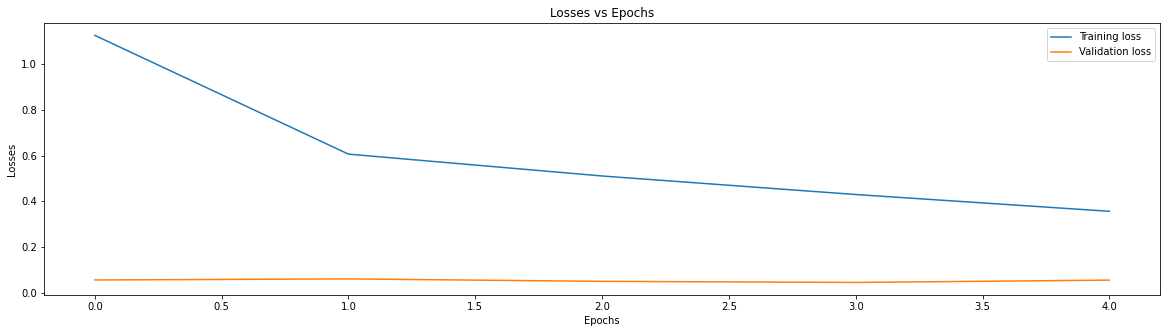

In [83]:
plt.figure(figsize = (20,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Losses vs Epochs')

# Prediction on test data

In [84]:
from keras.models import load_model
model = load_model('./transfer_model.h5')

In [85]:
pred = model.predict(X_test)

10/10 [==============================] - 8s 472ms/step


In [86]:
print(pred.shape)

(293, 1)


In [87]:
pred = pred.reshape(-1)

In [88]:
from sklearn.metrics import mean_squared_error, r2_score

In [89]:
print('Mean squared error : ' + str(mean_squared_error(y_test, pred)))
print('r2_score : ' + str(r2_score(y_test, pred)))

Mean squared error : 0.04481412312301138
r2_score : 0.06930517181342821


Text(0.5, 1.0, 'Comparison b/w predicted and real closing prices (Google)')

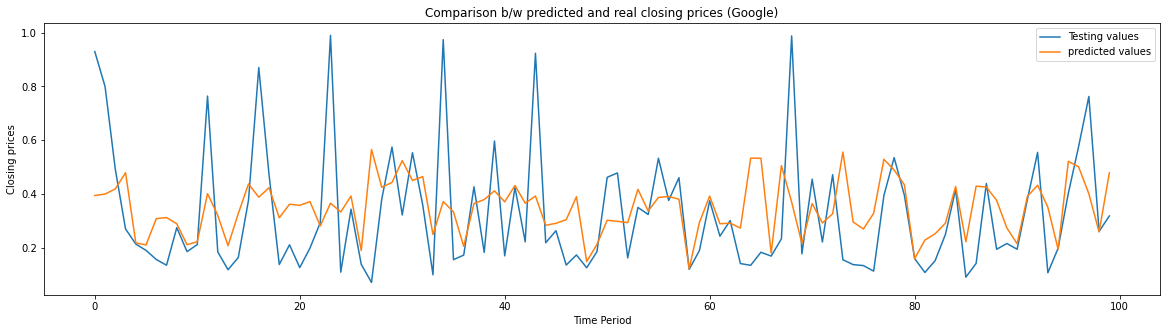

In [90]:
plt.figure(figsize = (20,5))

plt.plot(y_test[:100])
plt.plot(pred[:100])
plt.legend(['Testing values', 'predicted values'])
plt.xlabel('Time Period')
plt.ylabel('Closing prices')
plt.title('Comparison b/w predicted and real closing prices (Google)')

# Now let's evaluate model's performance on stock data of Amazon and Apple.

In [91]:
df = pandas.read_csv('/content/drive/MyDrive/NYSE STOCK PRICE PREDICTION PROJECT/DATASET/prices.csv')

In [92]:
apple = df[df['symbol'] == 'AAPL'].reset_index(drop = True)
amazn = df[df['symbol'] == 'AMZN'].reset_index(drop = True)

In [93]:
apple.head()

,date,symbol,open,close,low,high,volume
0,2010-01-04,AAPL,213.429998,214.009998,212.380001,214.499996,123432400.0
1,2010-01-05,AAPL,214.599998,214.379993,213.249994,215.589994,150476200.0
2,2010-01-06,AAPL,214.379993,210.969995,210.750004,215.230000,138040000.0
3,2010-01-07,AAPL,211.750000,210.580000,209.050005,212.000006,119282800.0
4,2010-01-08,AAPL,210.299994,211.980005,209.060005,212.000006,111902700.0


In [94]:
amazn.head()

,date,symbol,open,close,low,high,volume
0,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0
1,2010-01-05,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0
2,2010-01-06,AMZN,134.600006,132.250000,131.649994,134.729996,7178800.0
3,2010-01-07,AMZN,132.009995,130.000000,128.800003,132.320007,11030200.0
4,2010-01-08,AMZN,130.559998,133.520004,129.029999,133.679993,9830500.0


In [95]:
print('Apple,')
print('Number of missing values : ' + str(apple.isna().sum().sum()))
print(apple.shape)

print('Amazon')
print('Number of missing values : ' + str(amazn.isna().sum().sum()))
print(amazn.shape)

Apple,
Number of missing values : 0
(1762, 7)
Amazon
Number of missing values : 0
(1762, 7)


In [96]:
apple = apple.drop(['date', 'symbol'], axis = 1)
amazn = amazn.drop(['date', 'symbol'], axis = 1)

In [97]:
info = [[col, apple[col].count(), apple[col].max(), apple[col].min()] for col in apple.columns]
print(tabulate(info, headers = ['Feature', 'Count', 'Max', 'Min'], tablefmt = 'orgtbl'))

| Feature   |   Count |          Max |          Min |
|-----------+---------+--------------+--------------|
| open      |    1762 | 702.41       | 90           |
| close     |    1762 | 702.1        | 90.28        |
| low       |    1762 | 699.57       | 89.47        |
| high      |    1762 | 705.07       | 90.7         |
| volume    |    1762 |   4.7025e+08 |  1.14759e+07 |


In [98]:
info = [[col, amazn[col].count(), amazn[col].max(), amazn[col].min()] for col in amazn.columns]
print(tabulate(info, headers = ['Feature', 'Count', 'Max', 'Min'], tablefmt = 'orgtbl'))

| Feature   |   Count |           Max |       Min |
|-----------+---------+---------------+-----------|
| open      |    1762 | 845.79        |    105.93 |
| close     |    1762 | 844.36        |    108.61 |
| low       |    1762 | 840.6         |    105.8  |
| high      |    1762 | 847.21        |    111.29 |
| volume    |    1762 |   4.24211e+07 | 984400    |


# Create arrays
Only use **open price and volume traded**, as other features are correlated with closing price.

In [99]:
X_apple = np.array(apple.drop(['close', 'low', 'high'], axis = 1))
y_apple = np.array(apple['close'])

X_amazn = np.array(amazn.drop(['close', 'low', 'high'], axis = 1))
y_amazn = np.array(amazn['close'])

In [100]:
print(X_apple.shape)
print(y_apple.shape)

(1762, 2)
(1762,)


In [101]:
print(X_amazn.shape)
print(y_amazn.shape)

(1762, 2)
(1762,)


# Scale

In [102]:
X_apple = MinMaxScaler().fit_transform(X_apple)
X_amazn = MinMaxScaler().fit_transform(X_amazn)

In [103]:
t = np.reshape(y_apple, (len(y_apple),1))
t = MinMaxScaler().fit_transform(t)
y_apple = t.reshape(-1)

In [104]:
t = np.reshape(y_amazn, (len(y_amazn),1))
t = MinMaxScaler().fit_transform(t)
y_amazn = t.reshape(-1)

In [105]:
print(X_apple.max())
print(X_apple.min())

1.0000000000000002
0.0


In [106]:
print(y_apple.max())
print(y_apple.min())

1.0
0.0


In [107]:
print(X_amazn.max())
print(X_amazn.min())

1.0000000000000002
0.0


In [108]:
print(y_amazn.max())
print(y_amazn.min())

1.0
0.0


# Verify the shapes

In [109]:
print(X_apple.shape)
print(y_apple.shape)

(1762, 2)
(1762,)


In [110]:
print(X_amazn.shape)
print(y_amazn.shape)

(1762, 2)
(1762,)


# Create timesteps of size 300

In [111]:
length = 300

X_res_apple = []
y_res_apple = []

X_res_amazn = []
y_res_amazn = []

In [112]:
for i in range(length, len(X_apple)) :
    
    X_res_apple.append(X_apple[i-length:i])            # take 300 prior data for apple stock
    y_res_apple.append(y_apple[i])                     # next day closing price
    
    X_res_amazn.append(X_amazn[i-length:i])            # take 300 prior data for Amazonstock
    y_res_amazn.append(y_amazn[i])                     # next day closing price

X_res_apple, y_res_apple = np.array(X_res_apple), np.array(y_res_apple)
X_res_amazn, y_res_amazn = np.array(X_res_amazn), np.array(y_res_amazn)

In [113]:
print(X_res_apple.shape)
print(y_res_apple.shape)

(1462, 300, 2)
(1462,)


In [114]:
print(X_res_amazn.shape)
print(y_res_amazn.shape)

(1462, 300, 2)
(1462,)


In [115]:
from sklearn.utils import shuffle

In [116]:
X_res_apple, y_res_apple = shuffle(X_res_apple, y_res_apple, random_state = 1)
X_res_amazn, y_res_amazn = shuffle(X_res_amazn, y_res_amazn, random_state = 1)

# Predict for apple stock data

In [117]:
from keras.models import load_model
model = load_model('./transfer_model.h5')

In [118]:
for i, layer in enumerate(model.layers) :
    if i < 5 :
        layer.trainable = False

In [119]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 300, 256)          135168    
                                                                 
 sequential_5 (Sequential)   (None, 300, 128)          164864    
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [120]:
X_apple_train, X_apple_test, y_apple_train, y_apple_test = train_test_split(X_res_apple, y_res_apple, test_size = 0.2, random_state = 1)

In [121]:
print(X_apple_train.shape)
print(y_apple_train.shape)

(1169, 300, 2)
(1169,)


In [122]:
print(X_apple_test.shape)
print(y_apple_test.shape)

(293, 300, 2)
(293,)


### Training

In [123]:
checkp = ModelCheckpoint('./best_apple_model.h5', save_best_only = True, monitor = 'val_loss', verbose = 1)

In [124]:
history = model.fit(X_apple_train, y_apple_train, epochs = 5, batch_size = 32, validation_data = (X_apple_test, y_apple_test), callbacks = [checkp])

Epoch 1/5
37/37 [==============================] - ETA: 0s - loss: 0.3715
Epoch 1: val_loss improved from inf to 0.05626, saving model to ./best_apple_model.h5
37/37 [==============================] - 94s 2s/step - loss: 0.3715 - val_loss: 0.0563
Epoch 2/5
37/37 [==============================] - ETA: 0s - loss: 0.3404
Epoch 2: val_loss improved from 0.05626 to 0.05073, saving model to ./best_apple_model.h5
37/37 [==============================] - 76s 2s/step - loss: 0.3404 - val_loss: 0.0507
Epoch 3/5
37/37 [==============================] - ETA: 0s - loss: 0.2959
Epoch 3: val_loss improved from 0.05073 to 0.04379, saving model to ./best_apple_model.h5
37/37 [==============================] - 80s 2s/step - loss: 0.2959 - val_loss: 0.0438
Epoch 4/5
37/37 [==============================] - ETA: 0s - loss: 0.2551
Epoch 4: val_loss did not improve from 0.04379
37/37 [==============================] - 76s 2s/step - loss: 0.2551 - val_loss: 0.0889
Epoch 5/5
37/37 [==========================

In [125]:
model = load_model('./best_apple_model.h5')
y_apple_pred = model.predict(X_apple_test)

10/10 [==============================] - 8s 472ms/step


In [126]:
print(y_apple_pred.shape)

(293, 1)


In [127]:
y_apple_pred = y_apple_pred.reshape(-1)

In [128]:
print('Apple,')
print('Mean squared error : ' + str(mean_squared_error(y_apple_test, y_apple_pred)))
print('r2 score : ' + str(r2_score(y_apple_test, y_apple_pred)))

Apple,
Mean squared error : 0.039892953772363376
r2 score : 0.627607435239307


### Visualization

Text(0.5, 1.0, 'Closing price comparison for Apple dataset')

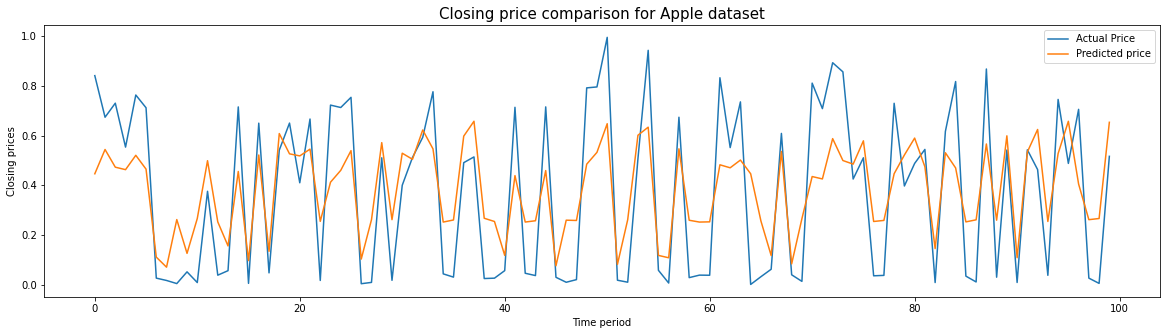

In [129]:
plt.figure(figsize = (20,5))

plt.plot(y_apple_test[100:200])
plt.plot(y_apple_pred[100:200])

plt.xlabel('Time period')
plt.ylabel('Closing prices')
plt.legend(['Actual Price', 'Predicted price'])
plt.title('Closing price comparison for Apple dataset', fontsize = 15)

# Predict for amazon stock data

In [130]:
model = load_model('./transfer_model.h5')

In [131]:
for i, layer in enumerate(model.layers) :
    if i < 5 :
        layer.trainable = False

In [132]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 300, 256)          135168    
                                                                 
 sequential_5 (Sequential)   (None, 300, 128)          164864    
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [133]:
X_amazn_train,  X_amazn_test, y_amazn_train, y_amazn_test = train_test_split(X_res_amazn, y_res_amazn, test_size = 0.2, random_state = 1)

In [134]:
print(X_amazn_train.shape)
print(y_amazn_train.shape)

(1169, 300, 2)
(1169,)


In [135]:
print(X_amazn_test.shape)
print(y_amazn_test.shape)

(293, 300, 2)
(293,)


### Train on the last layer

In [136]:
from keras.callbacks import ModelCheckpoint
checkp = ModelCheckpoint('./best_amazn_model.h5', monitor = 'val_loss', save_best_only = True, verbose = 1)

In [137]:
history = model.fit(X_amazn_train, y_amazn_train, epochs = 5, batch_size = 32, validation_data = (X_amazn_test, y_amazn_test), callbacks = [checkp])

Epoch 1/5
37/37 [==============================] - ETA: 0s - loss: 0.3777
Epoch 1: val_loss improved from inf to 0.09987, saving model to ./best_amazn_model.h5
37/37 [==============================] - 94s 2s/step - loss: 0.3777 - val_loss: 0.0999
Epoch 2/5
37/37 [==============================] - ETA: 0s - loss: 0.3187
Epoch 2: val_loss did not improve from 0.09987
37/37 [==============================] - 77s 2s/step - loss: 0.3187 - val_loss: 0.1175
Epoch 3/5
37/37 [==============================] - ETA: 0s - loss: 0.3012
Epoch 3: val_loss improved from 0.09987 to 0.06776, saving model to ./best_amazn_model.h5
37/37 [==============================] - 75s 2s/step - loss: 0.3012 - val_loss: 0.0678
Epoch 4/5
37/37 [==============================] - ETA: 0s - loss: 0.2567
Epoch 4: val_loss improved from 0.06776 to 0.06321, saving model to ./best_amazn_model.h5
37/37 [==============================] - 81s 2s/step - loss: 0.2567 - val_loss: 0.0632
Epoch 5/5
37/37 [==========================

### Use the 'best_amazn_model.h5' for prediction

In [138]:
model = load_model('./best_amazn_model.h5')

In [139]:
y_amazn_pred = model.predict(X_amazn_test)

10/10 [==============================] - 8s 476ms/step


In [140]:
print(y_amazn_pred.shape)

(293, 1)


In [141]:
y_amazn_pred = y_amazn_pred.reshape(-1)

In [142]:
print('Mean_sqaured_error : ' + str(mean_squared_error(y_amazn_test, y_amazn_pred)))
print('r2_score : ' + str(r2_score(y_amazn_test, y_amazn_pred)))

Mean_sqaured_error : 0.06321260988253022
r2_score : 0.0064331139275247695


### Visualization

Text(0.5, 1.0, 'Closing price comparison for Amazon dataset')

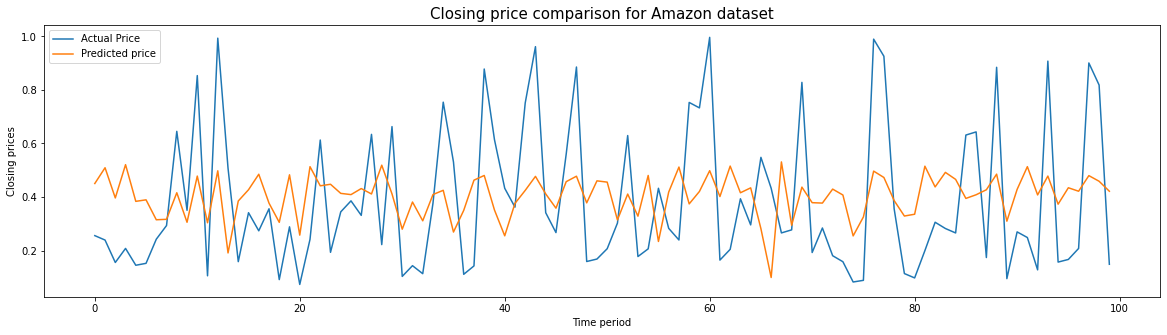

In [143]:
plt.figure(figsize = (20,5))

plt.plot(y_amazn_test[100:200])
plt.plot(y_amazn_pred[100:200])

plt.xlabel('Time period')
plt.ylabel('Closing prices')
plt.legend(['Actual Price', 'Predicted price'])
plt.title('Closing price comparison for Amazon dataset', fontsize = 15)